## Check ROMS output

Tim evaluates simulated MDT against CNES MDT CLS18 (as anomalies w.r.t their area-weighted regional mean)
and interannual sea-level variability against the AVISO product

The output from this run can also be compared to Tim's output


DATA:
- data = ROMS OUTPUT
- GLORYS12V1 = used reanalysis for lateral forcing https://resources.marine.copernicus.eu/product-detail/GLOBAL_MULTIYEAR_PHY_001_030/INFORMATION

altimeter (https://help.marine.copernicus.eu/en/articles/4667560-dissemination-of-the-ssalto-duacs-sea-level-anomalies-absolute-dynamic-topographies-height-and-geostrophic-velocities-and-gridded-wave-products-in-the-copernicus-marine-service)
- cmems altimeter = https://resources.marine.copernicus.eu/product-detail/SEALEVEL_EUR_PHY_L4_MY_008_068/INFORMATION this is AVISO+ product ADT gridded-merged product for Europe
I don't know if we need (https://resources.marine.copernicus.eu/product-detail/SEALEVEL_EUR_PHY_L4_MY_008_068/INFORMATION) or (https://resources.marine.copernicus.eu/product-detail/SEALEVEL_EUR_PHY_L4_NRT_OBSERVATIONS_008_060/INFORMATION) or (https://resources.marine.copernicus.eu/product-detail/SEALEVEL_GLO_PHY_L4_MY_008_047/INFORMATION)





Time periods
- roms_output_northsea4 = 1950 - 2000 (20days)
- roms_output_northsea8 = 1993 - 2018 (5days)
- roms_output_tim_northsea8 = 1993 - 2018 (yearly)
- glorys12v1_reanalysis = 1993 - 2018 (monthly)
- ora20c_reanalysis = 1950 - 2009 (monthly)
- aviso_altimetry = 1993 - 2020 (daily)



In [218]:
import xarray as xr
import pandas as pd
import numpy as np

import cartopy.crs as ccrs
import cartopy.feature as cf
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


In [219]:
# Import data
roms_output_northsea4 = xr.open_mfdataset('/Users/iriskeizer/Documents/ROMS/data/ROMS output/northsea4/1950_2000_5d/output/*')
roms_output_northsea8 = xr.open_mfdataset('/Users/iriskeizer/Documents/ROMS/data/ROMS output/timnorthsea8/*')
roms_output_tim_northsea8 = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/Tim/ROMS_output_tim.nc')
glorys12v1_rean = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/Glorys12v1/SSH/glorys12v1_annual.nc')
ora20c_rean = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/ORA20C/opa1_prepared.nc').zos
aviso_altimetry8 = xr.open_mfdataset('/Users/iriskeizer/Documents/ROMS/data/CMEMS altimetry/l4_duacs_0.125deg/*.nc', parallel = True)
aviso_altimetry4 = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/CMEMS altimetry/l4_duacs_0.25deg/cmems_obs-sl_glo_phy-ssh_my_allsat-l4-duacs-0.25deg_P1D_1659969934244.nc')
cnes_mdt = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/data/CNES MDT/dataset-mdt-cnes-cls18-global_1660042875042.nc')


# Remove not-full years
roms_output_northsea4 = roms_output_northsea4.where(roms_output_northsea4.ocean_time.dt.year < 2000, drop = True) # 6 months missing 2000
roms_output_northsea8 = roms_output_northsea8.where(roms_output_northsea8.ocean_time.dt.year < 2018, drop = True) # 4 data points missing 2018


# Obtain annual averages
roms_output_northsea4 = roms_output_northsea4.groupby('ocean_time.year').mean()
roms_output_northsea8 = roms_output_northsea8.groupby('ocean_time.year').mean()
ora20c_rean = ora20c_rean.groupby('time.year').mean(skipna=True)
aviso_altimetry8 = aviso_altimetry8.groupby('time.year').mean()
aviso_altimetry4 = aviso_altimetry4.groupby('time.year').mean()


# Make extent of the Glorys12v1 data similar to ROMS
glorys12v1_rean = glorys12v1_rean.where((glorys12v1_rean.latitude > 36) & (glorys12v1_rean.latitude < 62) & (glorys12v1_rean.longitude > -20) & (glorys12v1_rean.longitude < 10), drop = True)
cnes_mdt = cnes_mdt.where((cnes_mdt.latitude > 36) & (cnes_mdt.latitude < 62) & (cnes_mdt.longitude > -20) & (cnes_mdt.longitude < 10), drop = True)

# Add attributes 
aviso_altimetry8.adt.attrs['units'] = "m"
aviso_altimetry8.adt.attrs['long name'] = "Sea level height above the geoid"
aviso_altimetry4.adt.attrs['units'] = "m"
aviso_altimetry4.adt.attrs['long name'] = "Sea level height above the geoid"

# Sort data increasing
ora20c_rean = ora20c_rean.sortby(['lat', 'lon'])

### Plot maps of SLH for several years

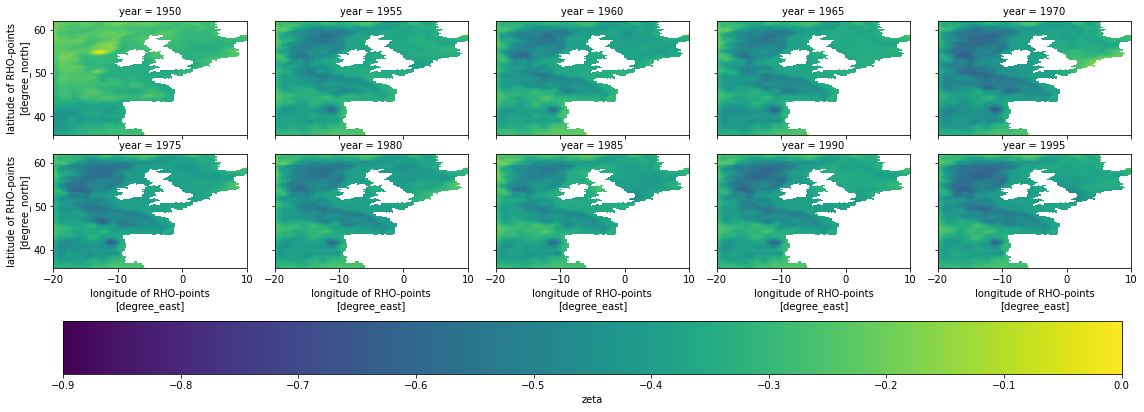

In [220]:
years = range(1950, 2000, 5)
roms_output_northsea4.sel(year = years).zeta.plot(col = 'year', col_wrap = 5, x = 'lon_rho', y='lat_rho', 
                                                  cbar_kwargs={'orientation': 'horizontal'}, vmin = -0.9, vmax = 0)

Plot of zeta resulting from the 1/4° ROMS run. What is the unit of zeta? I guess its meters. 

Apparently zeta only has negative values, that seems strange but might be different for MDT w.r.t. area-weighted regional mean

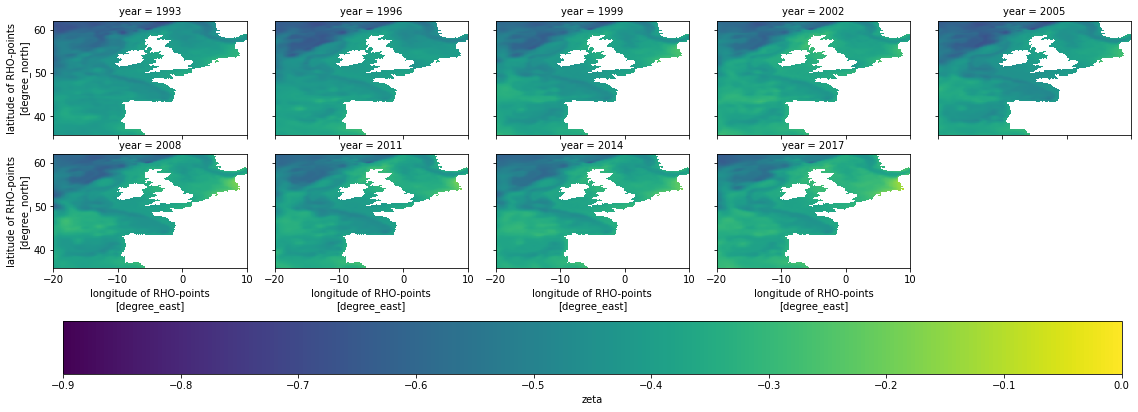

In [221]:
years = range(1993, 2018, 3)
roms_output_northsea8.sel(year = years).zeta.plot(col = 'year', col_wrap = 5, x = 'lon_rho', y='lat_rho', 
                                                  cbar_kwargs={'orientation': 'horizontal'}, vmin = -0.9, vmax = 0)

Plot of zeta resulting from the 1/8° ROMS run. Again the unit of zeta is unknown and zeta only has negative values.

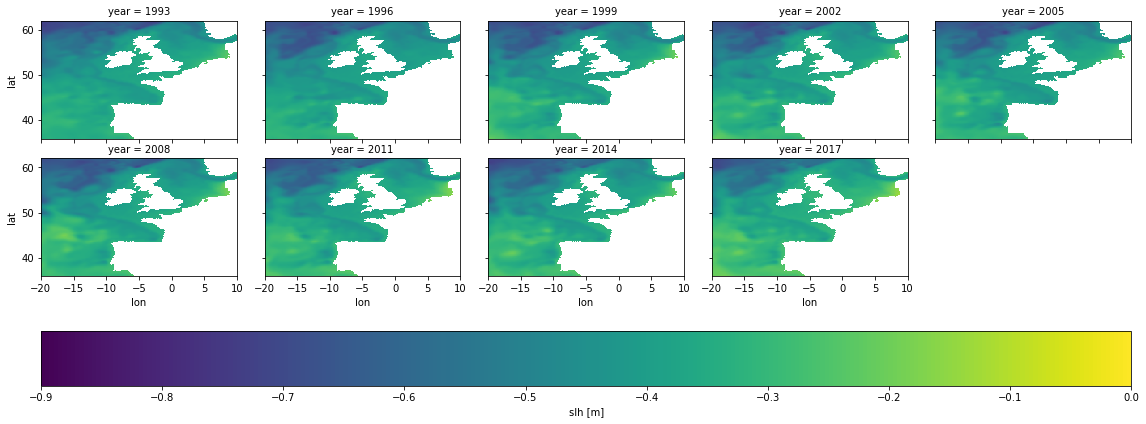

In [222]:
roms_output_tim_northsea8.sel(year = years).slh.plot(col = 'year', col_wrap = 5, cbar_kwargs={'orientation': 'horizontal'}, vmin = -0.9, vmax = 0)

Plot of slh resulting from 1/8° ROMS run performed by Tim. Also here values are only negative.

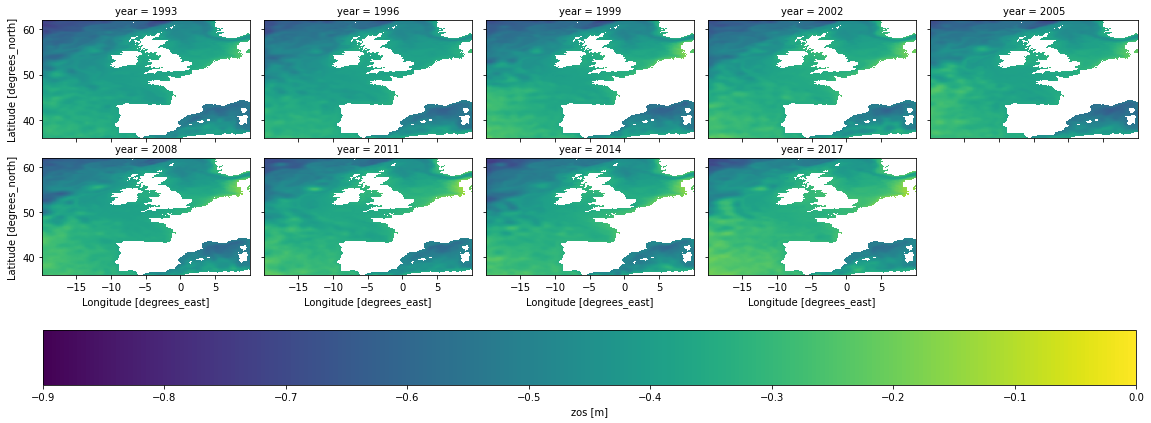

In [223]:
glorys12v1_rean.sel(year=years).zos.plot(col = 'year', col_wrap = 5, cbar_kwargs={'orientation': 'horizontal'}, vmin = -0.9, vmax = 0)

Plot of zos from GLORYS12V1 reanalysis. Also only has negative values so this doesn't seem weird anymore :)

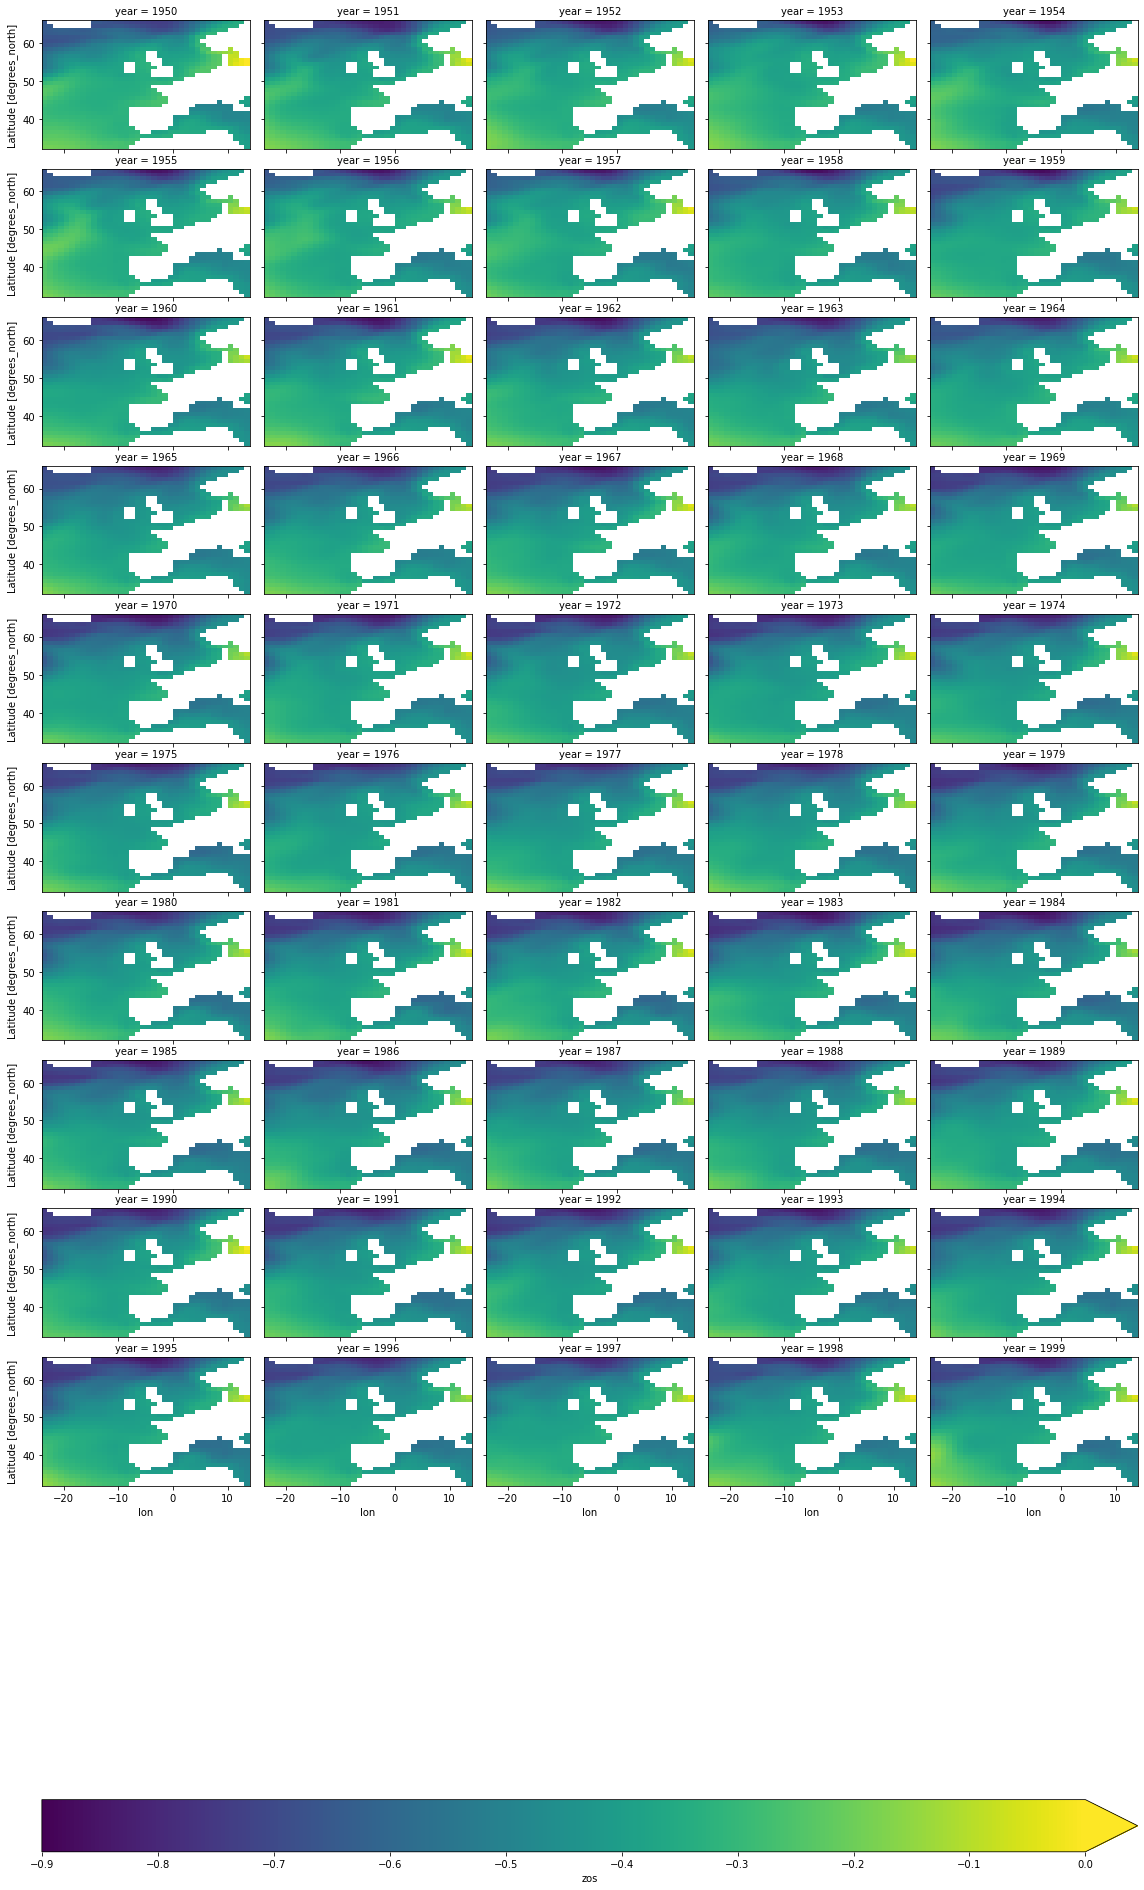

In [224]:
years = range(1950, 2000)
ora20c_rean.sel(year = years).plot(col = 'year', col_wrap = 5, cbar_kwargs={'orientation': 'horizontal'}, vmin = -0.9, vmax = 0)

The ORA-20C data is super weird again. For some years just all values are nan?

In [225]:
ora_data = xr.open_dataset('/Users/iriskeizer/Documents/ROMS/code/model2roms_ora20c/input/ora20c.nc')

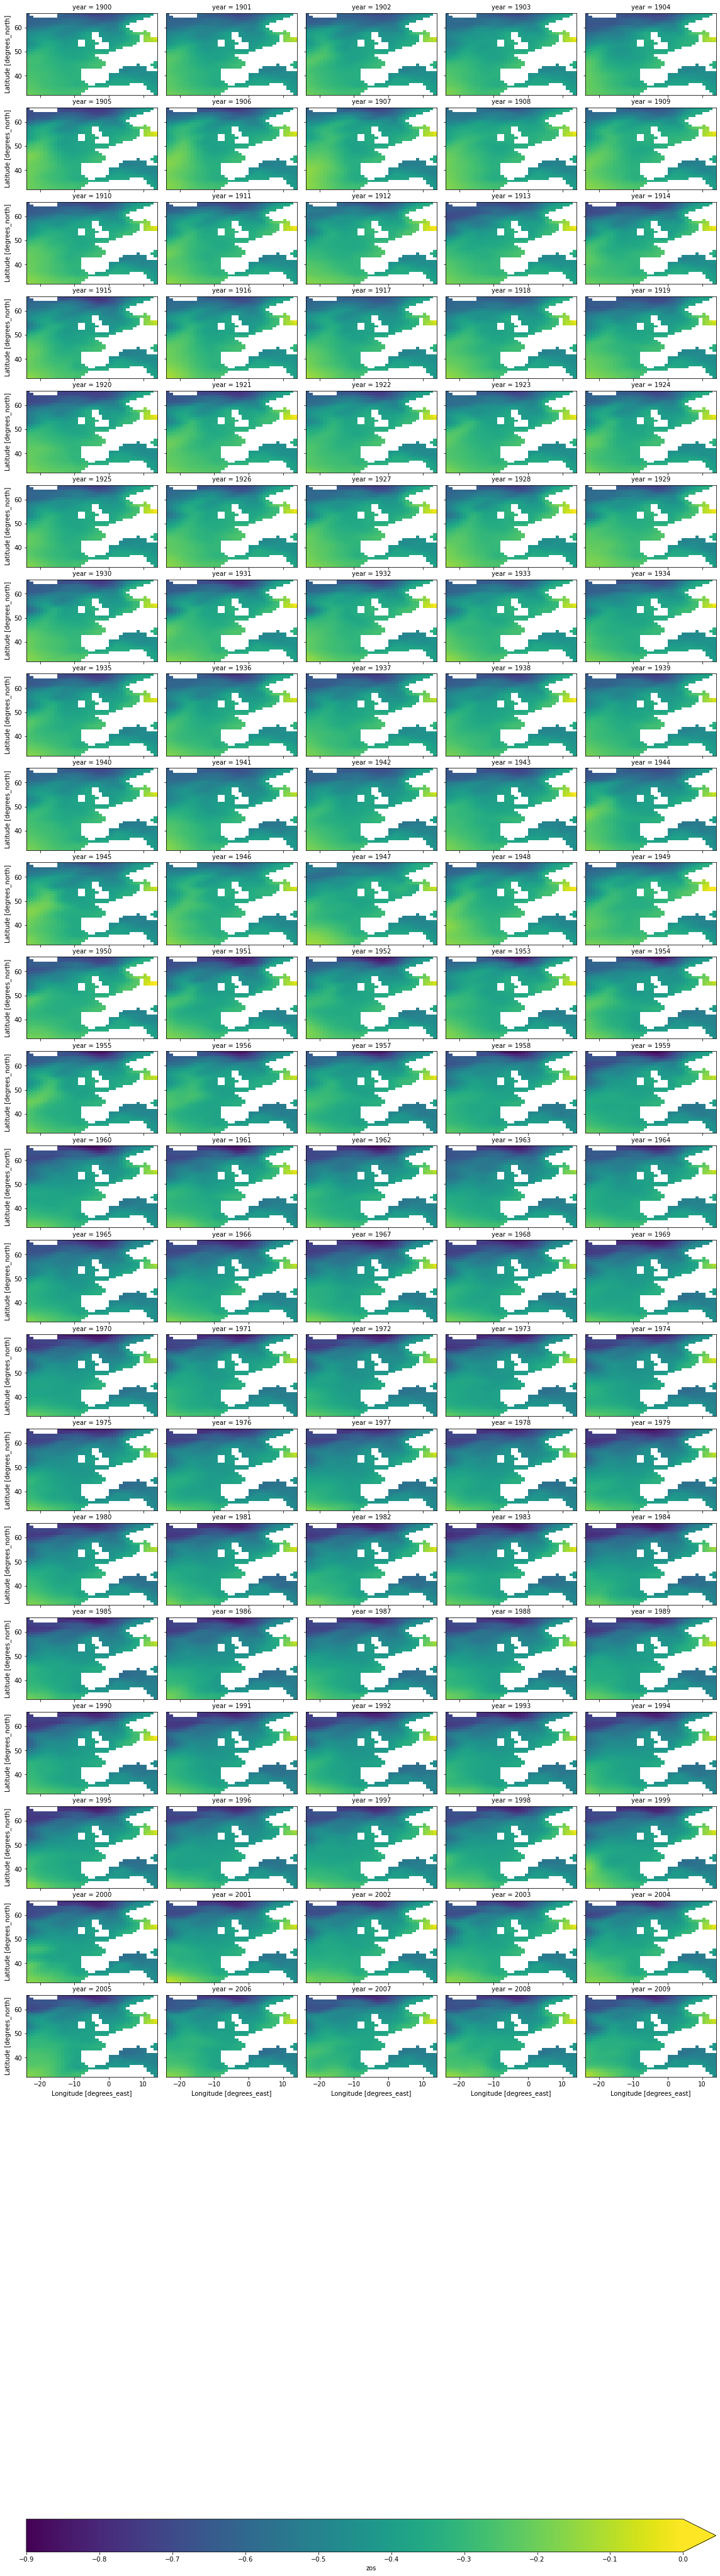

In [226]:
ora_data.zos.groupby('time.year').mean(skipna=True).sortby(['latitude', 'longitude']).plot(col = 'year', col_wrap = 5, cbar_kwargs={'orientation': 'horizontal'}, vmin = -0.9, vmax = 0)

The same is true for the ORA data I used as lateral forcing input. I really don't understand this. 

## Plot maps of SLH for overlapping years 1993 - 1999

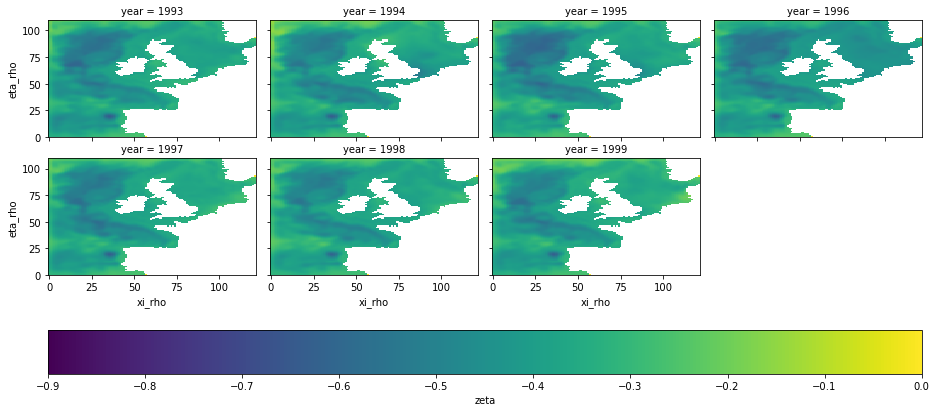

In [227]:
years = range(1993, 2000)
roms_output_northsea4.sel(year = years).zeta.plot(col = 'year', col_wrap = 4, cbar_kwargs={'orientation': 'horizontal'}, vmin = -0.9, vmax = 0)

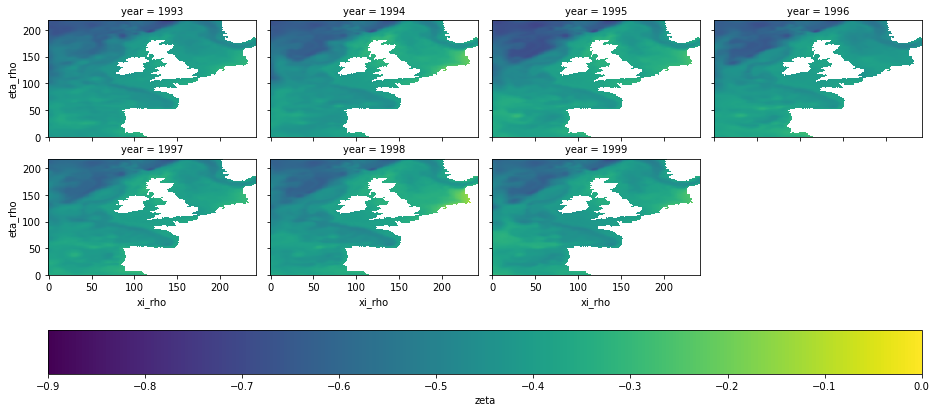

In [228]:
roms_output_northsea8.sel(year = years).zeta.plot(col = 'year', col_wrap = 4, cbar_kwargs={'orientation': 'horizontal'}, vmin = -0.9, vmax = 0)

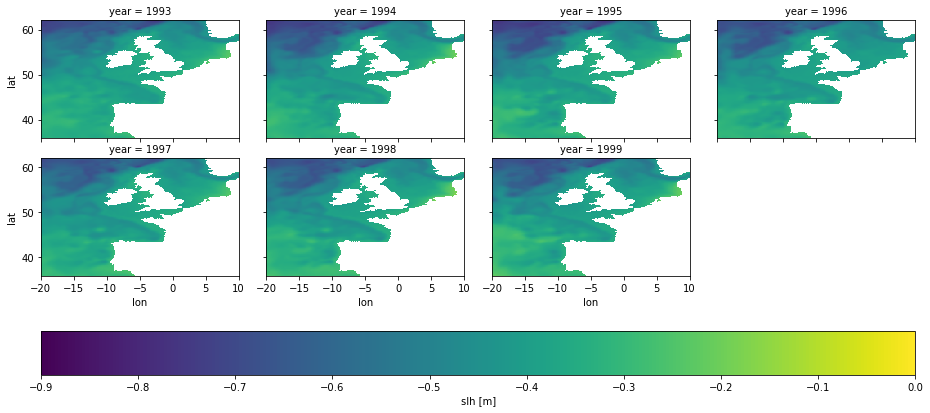

In [229]:
roms_output_tim_northsea8.sel(year = years).slh.plot(col = 'year', col_wrap = 4, cbar_kwargs={'orientation': 'horizontal'}, vmin = -0.9, vmax = 0)

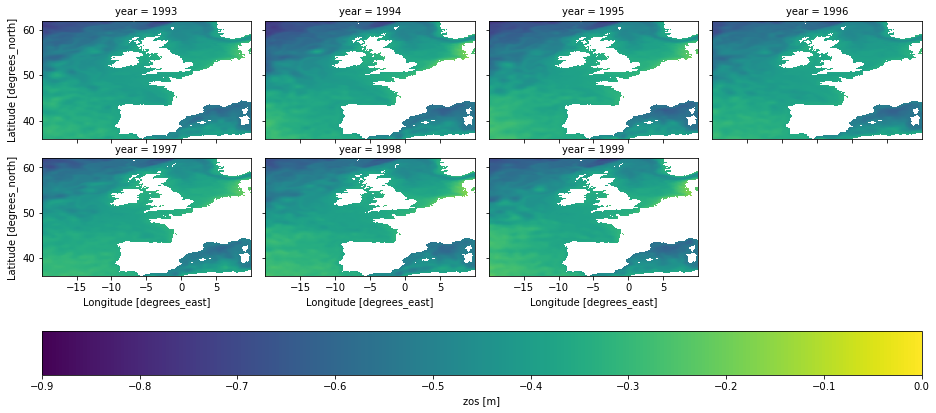

In [230]:
glorys12v1_rean.sel(year=years).zos.plot(col = 'year', col_wrap = 4, cbar_kwargs={'orientation': 'horizontal'}, vmin = -0.9, vmax = 0)

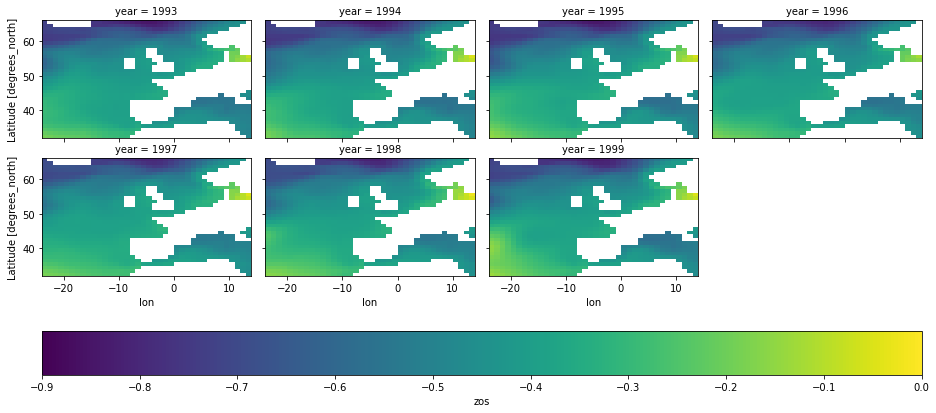

In [231]:
ora20c_rean.sel(year = years).plot(col = 'year', col_wrap = 4, cbar_kwargs={'orientation': 'horizontal'}, vmin = -0.9, vmax = 0)

There are no big outstanding differences between the maps for different data products except for ORA-20C. For ORA-20C there is data missing for some years and the much lower resolution makes comparison more difficult. The issue with missing data for some years should be investigated.

## Plot SLH for some locations along the Dutch coast

Something I should figure out to do is convert ROMS grid data back to lat lon values

In [232]:
def station_coords(): 
    """
    Function to obtain the coordinates of the tide gauge stations as a dataframe
    
    """
    path_slh = '/Users/iriskeizer/Documents/Wind effect/Data/observations/SLH/'
    stations = ['Vlissingen', 'Hoek v. Holland', 'Den Helder', 'Delfzijl', 'Harlingen', 'IJmuiden']
    
    # Necessary declarations to obtain tide gauge station coordinates
    path_locations = path_slh + 'rlr_annual/filelist.txt'
    loc_num = [20, 22, 23, 24, 25, 32]
    col_names = ['id', 'lat', 'lon', 'station', 'coastline_code', 'station_code', 'quality']
    
    # Create dataframe
    df = pd.read_csv(path_locations, sep=';', header=None, names=col_names)
    df = df.set_index('id')
    df = df.loc[loc_num, :]
    df['station'] = stations
    df = df.set_index('station')
    df = df.drop(['coastline_code', 'station_code', 'quality'], axis=1)
    
    return df

tg_coords = station_coords()

In [233]:
tg_coords

lat       lon
station                             
Vlissingen       51.442222  3.596111
Hoek v. Holland  51.977500  4.120000
Den Helder       52.964444  4.745000
Delfzijl         53.326389  6.933056
Harlingen        53.175556  5.409444
IJmuiden         52.462222  4.554722

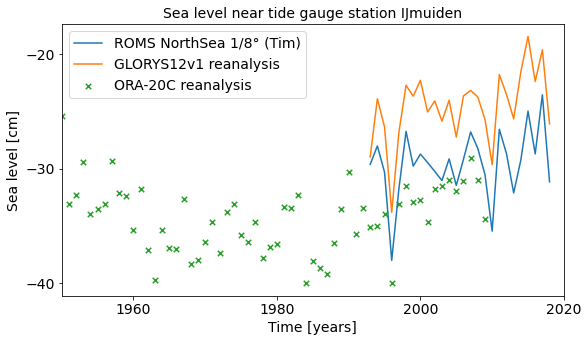

In [234]:
import matplotlib.pyplot as plt

station = 'IJmuiden'  # When station is changed for some datasets the values should be changed to move more towards the sea to not get NaN values

plt.figure(figsize = (9,5))

# Select data near station
roms_output_tim_northsea8_station = roms_output_tim_northsea8.sel(lat = tg_coords['lat'][station], lon = tg_coords['lon'][station]-0.01, method = 'Nearest')
glorys12v1_rean_station = glorys12v1_rean.sel(latitude = tg_coords['lat'][station], longitude = tg_coords['lon'][station], method = 'Nearest')
ora20c_rean_station = ora20c_rean.sel(lat = tg_coords['lat'][station], lon = tg_coords['lon'][station]-0.5, method = 'Nearest')

# Plot data
plt.plot(roms_output_tim_northsea8_station.year, roms_output_tim_northsea8_station.slh*100)
plt.plot(glorys12v1_rean_station.year, glorys12v1_rean_station.zos*100)
plt.scatter(ora20c_rean_station.year, ora20c_rean_station.values*100, marker = 'x', color = 'tab:green', s = 30)


# Format figure
fsize = 14

plt.xlabel('Time [years]', fontsize = fsize)
plt.ylabel('Sea level [cm]', fontsize = fsize)
plt.title(f'Sea level near tide gauge station {station}', fontsize = fsize)

plt.xlim([1950, 2020])
plt.xticks([1960, 1980, 2000, 2020], fontsize = fsize)
plt.yticks([-40, -30, -20], fontsize = fsize)




# Add legend
plt.legend(labels = ['ROMS NorthSea 1/8° (Tim)', 'GLORYS12v1 reanalysis', 'ORA-20C reanalysis'], fontsize = fsize)




## Plot MDT anomalies w.r.t. area-weighted regional mean

Actually, for good comparison, all data fields should be interpolated to the ROMS 1/4° grid

In [235]:
# Obtain anomaly w.r.t. area-weighted regional mean
weights = np.cos(np.deg2rad(cnes_mdt.latitude))
data_weighted = cnes_mdt.weighted(weights)
cnes_mdt_area_mean = data_weighted.mean(dim = ['latitude', 'longitude'])
cnes_mdt_anomaly = cnes_mdt - cnes_mdt_area_mean

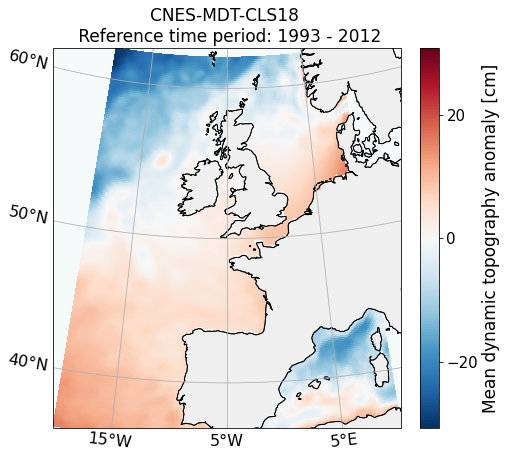

In [236]:

plt.figure(figsize = (7,7))
fsize = 14

ax = plt.axes(projection=ccrs.LambertConformal(central_longitude = -5, central_latitude = 49))
ax.coastlines()
cnes_mdt_anomaly_cm = cnes_mdt_anomaly.mdt*100
plot = cnes_mdt_anomaly_cm.plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False)
    
cb = plt.colorbar(plot, orientation = 'vertical', fraction = 0.05, ticks = [-20, 0, 20])                                   
cb.set_label(label = 'Mean dynamic topography anomaly [cm]', size = fsize+3)
cb.ax.tick_params(labelsize = fsize+1)                      
    
ax.set_title('CNES-MDT-CLS18 \n Reference time period: 1993 - 2012', fontsize = fsize+3)
ax.add_feature(cf.LAND, color = 'silver', alpha = 0.25)
ax.add_feature(cf.OCEAN, color='lightblue', alpha = 0.12)
ax.coastlines(resolution = '50m', linewidth=.7, color = 'k')
ax.set_extent([-20, 10, 36, 62], crs=ccrs.PlateCarree())
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True)
gl.top_labels = False
gl.x_inline = False
gl.right_labels = False
gl.xlabel_style = {'size': fsize+2}
gl.ylabel_style = {'size': fsize+2}
gl.ylocator = mticker.FixedLocator([40, 50, 60])
gl.xlocator = mticker.FixedLocator([-15, -5, 5])

I also have to obtain the anomaly w.r.t. area-weighted regional mean for CNES-MDT-CLS18

In [237]:
# Select data from 1993 - 1999 and obtain time average to get MDT
roms_output_northsea_mdt = roms_output_northsea4.zeta.where((roms_output_northsea4.year > 1992) & (roms_output_northsea4.year < 2013), drop = True).mean('year')


# Obtain anomaly w.r.t. area-weighted regional mean
weights = np.cos(np.deg2rad(roms_output_northsea_mdt.latitude))
data_weighted = data.weighted(weights)
roms_output_northsea_area_mean = data_weighted.mean(dim = ['latitude', 'longitude'])
roms_output_northsea_mdt_anomaly = roms_output_northsea_mdt - roms_output_northsea_area_mean



AttributeError: 'DataArray' object has no attribute 'latitude'

In [ ]:
# Select data from 1993 - 2012 and obtain time average to get MDT
roms_output_tim_northsea8_mdt = roms_output_tim_northsea8.slh.where((roms_output_tim_northsea8.year > 1992) & (roms_output_tim_northsea8.year < 2013), drop = True).mean('year')


# Obtain anomaly w.r.t. area-weighted regional mean
weights = np.cos(np.deg2rad(roms_output_tim_northsea8_mdt.lat))
data_weighted = roms_output_tim_northsea8_mdt.weighted(weights)

roms_output_tim_northsea8_mdt_area_mean = data_weighted.mean(dim = ['lat', 'lon'])
roms_output_tim_northsea8_mdt_anomaly = roms_output_tim_northsea8_mdt - roms_output_tim_northsea8_mdt_area_mean


In [ ]:
# Create plot for roms_output_tim_northsea8

plt.figure(figsize = (7,7))
fsize = 14

ax = plt.axes(projection=ccrs.LambertConformal(central_longitude = -5, central_latitude = 49))
ax.coastlines()
roms_output_tim_northsea8_mdt_anomaly_cm = roms_output_tim_northsea8_mdt_anomaly*100
plot = roms_output_tim_northsea8_mdt_anomaly_cm.plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False)
    
cb = plt.colorbar(plot, orientation = 'vertical', fraction = 0.05, ticks = [-20, 0, 20])                                   
cb.set_label(label = 'Mean dynamic topography anomaly [cm]', size = fsize+3)
cb.ax.tick_params(labelsize = fsize+1)                      
    
ax.set_title('ROMS NorthSea 1/8° (Tim) \n Reference time period: 1993 - 2012', fontsize = fsize+3)
ax.add_feature(cf.LAND, color = 'silver', alpha = 0.25)
ax.add_feature(cf.OCEAN, color='lightblue', alpha = 0.12)
ax.coastlines(resolution = '50m', linewidth=.7, color = 'k')
ax.set_extent([-20, 10, 36, 62], crs=ccrs.PlateCarree())
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True)
gl.top_labels = False
gl.x_inline = False
gl.right_labels = False
gl.xlabel_style = {'size': fsize+2}
gl.ylabel_style = {'size': fsize+2}
gl.ylocator = mticker.FixedLocator([40, 50, 60])
gl.xlocator = mticker.FixedLocator([-15, -5, 5])

In [ ]:
# Select data from 1993 - 2012 and obtain time average to get MDT
glorys12v1_rean_mdt = glorys12v1_rean.zos.where((glorys12v1_rean.year > 1992) & (glorys12v1_rean.year < 2013), drop = True).mean('year')


# Obtain anomaly w.r.t. area-weighted regional mean
weights = np.cos(np.deg2rad(glorys12v1_rean_mdt.latitude))
data_weighted = glorys12v1_rean_mdt.weighted(weights)

glorys12v1_rean_mdt_area_mean = data_weighted.mean(dim = ['latitude', 'longitude'])
glorys12v1_rean_mdt_anomaly = glorys12v1_rean_mdt - glorys12v1_rean_mdt_area_mean


In [ ]:
# Create plot for glorys12v1_rean

plt.figure(figsize = (7,7))
fsize = 14

ax = plt.axes(projection=ccrs.LambertConformal(central_longitude = -5, central_latitude = 49))
ax.coastlines()
glorys12v1_rean_mdt_anomaly_cm = glorys12v1_rean_mdt_anomaly*100
plot = glorys12v1_rean_mdt_anomaly_cm.plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False)
    
cb = plt.colorbar(plot, orientation = 'vertical', fraction = 0.05, ticks = [-20, 0, 20])                                   
cb.set_label(label = 'Mean dynamic topography anomaly [cm]', size = fsize+3)
cb.ax.tick_params(labelsize = fsize+1)                      
    
ax.set_title('GLORYS12v1 reanalysis \n Reference time period: 1993 - 2012', fontsize = fsize+3)
ax.add_feature(cf.LAND, color = 'silver', alpha = 0.25)
ax.add_feature(cf.OCEAN, color='lightblue', alpha = 0.12)
ax.coastlines(resolution = '50m', linewidth=.7, color = 'k')
ax.set_extent([-20, 10, 36, 62], crs=ccrs.PlateCarree())
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True)
gl.top_labels = False
gl.x_inline = False
gl.right_labels = False
gl.xlabel_style = {'size': fsize+2}
gl.ylabel_style = {'size': fsize+2}
gl.ylocator = mticker.FixedLocator([40, 50, 60])
gl.xlocator = mticker.FixedLocator([-15, -5, 5])

In [ ]:
# Select data from 1993 - 2012 and obtain time average to get MDT
ora20c_rean_mdt = ora20c_rean.where((ora20c_rean.year > 1992) & (ora20c_rean.year < 2013), drop = True).mean('year')


# Obtain anomaly w.r.t. area-weighted regional mean
weights = np.cos(np.deg2rad(ora20c_rean_mdt.lat))
data_weighted = ora20c_rean_mdt.weighted(weights)

ora20c_rean_mdt_area_mean = data_weighted.mean(dim = ['lat', 'lon'])
ora20c_rean_mdt_anomaly = ora20c_rean_mdt - ora20c_rean_mdt_area_mean


In [ ]:
# Create plot for ora20c_rean

plt.figure(figsize = (7,7))
fsize = 14

ax = plt.axes(projection=ccrs.LambertConformal(central_longitude = -5, central_latitude = 49))
ax.coastlines()
ora20c_rean_mdt_anomaly_cm = ora20c_rean_mdt_anomaly*100
plot = ora20c_rean_mdt_anomaly_cm.plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False)
    
cb = plt.colorbar(plot, orientation = 'vertical', fraction = 0.05, ticks = [-20, 0, 20])                                   
cb.set_label(label = 'Mean dynamic topography anomaly [cm]', size = fsize+3)
cb.ax.tick_params(labelsize = fsize+1)                      
    
ax.set_title('ORA-20C reanalysis \n Reference time period: 1993 - 2009', fontsize = fsize+3)
ax.add_feature(cf.LAND, color = 'silver', alpha = 0.25)
ax.add_feature(cf.OCEAN, color='lightblue', alpha = 0.12)
ax.coastlines(resolution = '50m', linewidth=.7, color = 'k')
ax.set_extent([-20, 10, 36, 62], crs=ccrs.PlateCarree())
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True)
gl.top_labels = False
gl.x_inline = False
gl.right_labels = False
gl.xlabel_style = {'size': fsize+2}
gl.ylabel_style = {'size': fsize+2}
gl.ylocator = mticker.FixedLocator([40, 50, 60])
gl.xlocator = mticker.FixedLocator([-15, -5, 5])

## Plot interannual sea-level variability as standard deviation of detrended, annual mean sea level



In [ ]:
# Obtain overlapping period 1993 - 1999
roms_output_northsea4_s = roms_output_northsea4.where((roms_output_northsea4.year > 1992) & (roms_output_northsea4.year < 2000), drop = True)

# Obtain detrended data
roms_output_northsea4_dt = roms_output_northsea4_s.zeta - xr.polyval(roms_output_northsea4_s.year, roms_output_northsea4_s.zeta.polyfit(dim = 'year', deg = 3).polyfit_coefficients)

# Obtain standard deviation
roms_output_northsea4_dt_std = roms_output_northsea4_dt.std(dim = ['year'])

In [ ]:
# Create plot for roms_output_northsea4

plt.figure(figsize = (7,7))
fsize = 14

ax = plt.axes(projection=ccrs.LambertConformal(central_longitude = -5, central_latitude = 49))
ax.coastlines()
roms_output_northsea4_dt_std_cm = roms_output_northsea4_dt_std*100
plot = roms_output_northsea4_dt_std_cm.plot(ax=ax, transform=ccrs.PlateCarree(), x = 'lon_rho', y='lat_rho', add_colorbar=False)
    
cb = plt.colorbar(plot, orientation = 'vertical', fraction = 0.05, ticks = [0,1,2,3,4])                                   
cb.set_label(label = 'Standard deviation [cm]', size = fsize+3)
cb.ax.tick_params(labelsize = fsize+1)                      
    
ax.set_title('ROMS NorthSea 1/4° \n Reference time period: 1993 - 1999', fontsize = fsize+3)
ax.add_feature(cf.LAND, color = 'silver', alpha = 0.25)
ax.add_feature(cf.OCEAN, color='lightblue', alpha = 0.12)
ax.coastlines(resolution = '50m', linewidth=.7, color = 'k')
ax.set_extent([-20, 10, 36, 62], crs=ccrs.PlateCarree())
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True)
gl.top_labels = False
gl.x_inline = False
gl.right_labels = False
gl.xlabel_style = {'size': fsize+2}
gl.ylabel_style = {'size': fsize+2}
gl.ylocator = mticker.FixedLocator([40, 50, 60])
gl.xlocator = mticker.FixedLocator([-15, -5, 5])

In [ ]:
# Obtain overlapping period 1993 - 1999
aviso_altimetry4_s = aviso_altimetry4.where((aviso_altimetry4.year > 1992) & (aviso_altimetry4.year < 2000), drop = True)

# Obtain detrended data
aviso_altimetry4_dt = aviso_altimetry4_s.adt - xr.polyval(aviso_altimetry4_s.year, aviso_altimetry4_s.adt.polyfit(dim = 'year', deg = 3).polyfit_coefficients)

# Obtain standard deviation
aviso_altimetry4_dt_std = aviso_altimetry4_dt.std(dim = ['year'])

In [ ]:
# Create plot for roms_output_northsea4

plt.figure(figsize = (7,7))
fsize = 14

ax = plt.axes(projection=ccrs.LambertConformal(central_longitude = -5, central_latitude = 49))
ax.coastlines()
aviso_altimetry4_dt_std_cm = aviso_altimetry4_dt_std*100
plot = aviso_altimetry4_dt_std_cm.plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False)
    
cb = plt.colorbar(plot, orientation = 'vertical', fraction = 0.05, ticks = [0,1,2,3,4])                                   
cb.set_label(label = 'Standard deviation [cm]', size = fsize+3)
cb.ax.tick_params(labelsize = fsize+1)                      
    
ax.set_title('AVISO altimetry 1/4° \n Reference time period: 1993 - 1999', fontsize = fsize+3)
ax.add_feature(cf.LAND, color = 'silver', alpha = 0.25)
ax.add_feature(cf.OCEAN, color='lightblue', alpha = 0.12)
ax.coastlines(resolution = '50m', linewidth=.7, color = 'k')
ax.set_extent([-20, 10, 36, 62], crs=ccrs.PlateCarree())
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True)
gl.top_labels = False
gl.x_inline = False
gl.right_labels = False
gl.xlabel_style = {'size': fsize+2}
gl.ylabel_style = {'size': fsize+2}
gl.ylocator = mticker.FixedLocator([40, 50, 60])
gl.xlocator = mticker.FixedLocator([-15, -5, 5])

In [ ]:
# Obtain overlapping period 1993 - 1999
roms_output_northsea8_s = roms_output_northsea8.where((roms_output_northsea8.year > 1992) & (roms_output_northsea8.year < 2000), drop = True)

# Obtain detrended data
roms_output_northsea8_dt = roms_output_northsea8_s.zeta - xr.polyval(roms_output_northsea8_s.year, roms_output_northsea8_s.zeta.polyfit(dim = 'year', deg = 3).polyfit_coefficients)

# Obtain standard deviation
roms_output_northsea8_dt_std = roms_output_northsea8_dt.std(dim = ['year'])

In [ ]:
# Create plot for roms_output_northsea4

plt.figure(figsize = (7,7))
fsize = 14

ax = plt.axes(projection=ccrs.LambertConformal(central_longitude = -5, central_latitude = 49))
ax.coastlines()
roms_output_northsea8_dt_std_cm = roms_output_northsea8_dt_std*100
plot = roms_output_northsea8_dt_std_cm.plot(ax=ax, transform=ccrs.PlateCarree(), x = 'lon_rho', y='lat_rho', add_colorbar=False)
    
cb = plt.colorbar(plot, orientation = 'vertical', fraction = 0.05, ticks = [0,1,2,3,4])                                   
cb.set_label(label = 'Standard deviation [cm]', size = fsize+3)
cb.ax.tick_params(labelsize = fsize+1)                      
    
ax.set_title('ROMS NorthSea 1/8° \n Reference time period: 1993 - 1999', fontsize = fsize+3)
ax.add_feature(cf.LAND, color = 'silver', alpha = 0.25)
ax.add_feature(cf.OCEAN, color='lightblue', alpha = 0.12)
ax.coastlines(resolution = '50m', linewidth=.7, color = 'k')
ax.set_extent([-20, 10, 36, 62], crs=ccrs.PlateCarree())
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True)
gl.top_labels = False
gl.x_inline = False
gl.right_labels = False
gl.xlabel_style = {'size': fsize+2}
gl.ylabel_style = {'size': fsize+2}
gl.ylocator = mticker.FixedLocator([40, 50, 60])
gl.xlocator = mticker.FixedLocator([-15, -5, 5])

In [ ]:
# Obtain overlapping period 1993 - 1999
roms_output_tim_northsea8_s = roms_output_tim_northsea8.where((roms_output_tim_northsea8.year > 1992) & (roms_output_tim_northsea8.year < 2000), drop = True)

# Obtain detrended data
roms_output_tim_northsea8_dt = roms_output_tim_northsea8_s.slh - xr.polyval(roms_output_tim_northsea8_s.year, roms_output_tim_northsea8_s.slh.polyfit(dim = 'year', deg = 3).polyfit_coefficients)

# Obtain standard deviation
roms_output_tim_northsea8_dt_std = roms_output_tim_northsea8_dt.std(dim = ['year'])

In [ ]:
# Create plot for roms_output_northsea4

plt.figure(figsize = (7,7))
fsize = 14

ax = plt.axes(projection=ccrs.LambertConformal(central_longitude = -5, central_latitude = 49))
ax.coastlines()
roms_output_tim_northsea8_dt_std_cm = roms_output_tim_northsea8_dt_std*100
plot = roms_output_tim_northsea8_dt_std_cm.plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False)
    
cb = plt.colorbar(plot, orientation = 'vertical', fraction = 0.05, ticks = [0,1,2,3,4])                                   
cb.set_label(label = 'Standard deviation [cm]', size = fsize+3)
cb.ax.tick_params(labelsize = fsize+1)                      
    
ax.set_title('ROMS NorthSea 1/8° (Tim)\n Reference time period: 1993 - 1999', fontsize = fsize+3)
ax.add_feature(cf.LAND, color = 'silver', alpha = 0.25)
ax.add_feature(cf.OCEAN, color='lightblue', alpha = 0.12)
ax.coastlines(resolution = '50m', linewidth=.7, color = 'k')
ax.set_extent([-20, 10, 36, 62], crs=ccrs.PlateCarree())
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True)
gl.top_labels = False
gl.x_inline = False
gl.right_labels = False
gl.xlabel_style = {'size': fsize+2}
gl.ylabel_style = {'size': fsize+2}
gl.ylocator = mticker.FixedLocator([40, 50, 60])
gl.xlocator = mticker.FixedLocator([-15, -5, 5])

In [ ]:
# Obtain overlapping period 1993 - 1999
aviso_altimetry8_s = aviso_altimetry8.where((aviso_altimetry8.year > 1992) & (aviso_altimetry8.year < 2000), drop = True)

# Obtain detrended data
aviso_altimetry8_dt = aviso_altimetry8_s.adt - xr.polyval(aviso_altimetry8_s.year, aviso_altimetry8_s.adt.polyfit(dim = 'year', deg = 3).polyfit_coefficients)

# Obtain standard deviation
aviso_altimetry8_dt_std = aviso_altimetry8_dt.std(dim = ['year'])

In [ ]:
# Create plot for roms_output_northsea4

plt.figure(figsize = (7,7))
fsize = 14

ax = plt.axes(projection=ccrs.LambertConformal(central_longitude = -5, central_latitude = 49))
ax.coastlines()
aviso_altimetry8_dt_std_cm = aviso_altimetry8_dt_std*100
plot = aviso_altimetry8_dt_std_cm.plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False)
    
cb = plt.colorbar(plot, orientation = 'vertical', fraction = 0.05, ticks = [0,1,2,3,4])                                   
cb.set_label(label = 'Standard deviation [cm]', size = fsize+3)
cb.ax.tick_params(labelsize = fsize+1)                      
    
ax.set_title('AVISO altimetry 1/8° \n Reference time period: 1993 - 1999', fontsize = fsize+3)
ax.add_feature(cf.LAND, color = 'silver', alpha = 0.25)
ax.add_feature(cf.OCEAN, color='lightblue', alpha = 0.12)
ax.coastlines(resolution = '50m', linewidth=.7, color = 'k')
ax.set_extent([-20, 10, 36, 62], crs=ccrs.PlateCarree())
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True)
gl.top_labels = False
gl.x_inline = False
gl.right_labels = False
gl.xlabel_style = {'size': fsize+2}
gl.ylabel_style = {'size': fsize+2}
gl.ylocator = mticker.FixedLocator([40, 50, 60])
gl.xlocator = mticker.FixedLocator([-15, -5, 5])

In [ ]:
# Obtain overlapping period 1993 - 1999
glorys12v1_rean_s = glorys12v1_rean.where((glorys12v1_rean.year > 1992) & (glorys12v1_rean.year < 2000), drop = True)

# Obtain detrended data
glorys12v1_rean_dt = glorys12v1_rean_s.zos - xr.polyval(glorys12v1_rean_s.year, glorys12v1_rean_s.zos.polyfit(dim = 'year', deg = 3).polyfit_coefficients)

# Obtain standard deviation
glorys12v1_rean_dt_std = glorys12v1_rean_dt.std(dim = ['year'])

In [ ]:
# Create plot for roms_output_northsea4

plt.figure(figsize = (7,7))
fsize = 14

ax = plt.axes(projection=ccrs.LambertConformal(central_longitude = -5, central_latitude = 49))
ax.coastlines()
glorys12v1_rean_dt_std_cm = glorys12v1_rean_dt_std*100
plot = glorys12v1_rean_dt_std_cm.plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False)
    
cb = plt.colorbar(plot, orientation = 'vertical', fraction = 0.05, ticks = [0,1,2,3,4])                                   
cb.set_label(label = 'Standard deviation [cm]', size = fsize+3)
cb.ax.tick_params(labelsize = fsize+1)                      
    
ax.set_title('GLORYS12v1 reanalysis \n Reference time period: 1993 - 1999', fontsize = fsize+3)
ax.add_feature(cf.LAND, color = 'silver', alpha = 0.25)
ax.add_feature(cf.OCEAN, color='lightblue', alpha = 0.12)
ax.coastlines(resolution = '50m', linewidth=.7, color = 'k')
ax.set_extent([-20, 10, 36, 62], crs=ccrs.PlateCarree())
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True)
gl.top_labels = False
gl.x_inline = False
gl.right_labels = False
gl.xlabel_style = {'size': fsize+2}
gl.ylabel_style = {'size': fsize+2}
gl.ylocator = mticker.FixedLocator([40, 50, 60])
gl.xlocator = mticker.FixedLocator([-15, -5, 5])

In [ ]:
# Obtain overlapping period 1993 - 1999
ora20c_rean_s = ora20c_rean.where((ora20c_rean.year > 1992) & (ora20c_rean.year < 2000), drop = True)

# Obtain detrended data
ora20c_rean_dt = ora20c_rean_s - xr.polyval(ora20c_rean_s.year, ora20c_rean_s.polyfit(dim = 'year', deg = 3).polyfit_coefficients)

# Obtain standard deviation
ora20c_rean_dt_std = ora20c_rean_dt.std(dim = ['year'])

In [ ]:
# Create plot for roms_output_northsea4

plt.figure(figsize = (7,7))
fsize = 14

ax = plt.axes(projection=ccrs.LambertConformal(central_longitude = -5, central_latitude = 49))
ax.coastlines()
ora20c_rean_dt_std_cm = ora20c_rean_dt_std*100
plot = ora20c_rean_dt_std_cm.plot(ax=ax, transform=ccrs.PlateCarree(), add_colorbar=False)
    
cb = plt.colorbar(plot, orientation = 'vertical', fraction = 0.05, ticks = [0,1,2,3,4])                                   
cb.set_label(label = 'Standard deviation [cm]', size = fsize+3)
cb.ax.tick_params(labelsize = fsize+1)                      
    
ax.set_title('ORA-20C reanalysis \n Reference time period: 1993 - 1999', fontsize = fsize+3)
ax.add_feature(cf.LAND, color = 'silver', alpha = 0.25)
ax.add_feature(cf.OCEAN, color='lightblue', alpha = 0.12)
ax.coastlines(resolution = '50m', linewidth=.7, color = 'k')
ax.set_extent([-20, 10, 36, 62], crs=ccrs.PlateCarree())
    
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True)
gl.top_labels = False
gl.x_inline = False
gl.right_labels = False
gl.xlabel_style = {'size': fsize+2}
gl.ylabel_style = {'size': fsize+2}
gl.ylocator = mticker.FixedLocator([40, 50, 60])
gl.xlocator = mticker.FixedLocator([-15, -5, 5])